In [ ]:
!pip install scanpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Connect CoLab with GoogleDrive
# Call packages
import numpy as np
import pandas as pd
import seaborn as sns
import scanpy as sc
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
%matplotlib inline

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.12.2 pynndescent==0.5.8
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import genomic data
input_file = 'drive/MyDrive/MSK/data_mrna_seq_v2_rsem_zscores_ref_normal_samples.txt'
raw_data = pd.read_table(input_file, sep='\t', header=None)
raw_data.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252

,0,1,2,3,4,5,6,7,8,9,...,584,585,586,587,588,589,590,591,592,593
0,Hugo_Symbol,Entrez_Gene_Id,TCGA-3L-AA1B-01,TCGA-4N-A93T-01,TCGA-4T-AA8H-01,TCGA-5M-AAT4-01,TCGA-5M-AAT5-01,TCGA-5M-AAT6-01,TCGA-5M-AATA-01,TCGA-5M-AATE-01,...,TCGA-AG-A01N-01,TCGA-AG-A01W-01,TCGA-AG-A01Y-01,TCGA-AG-A020-01,TCGA-AG-A025-01,TCGA-AG-A026-01,TCGA-AG-A02G-01,TCGA-AG-A02N-01,TCGA-AG-A02X-01,TCGA-AG-A032-01
1,NaN,100130426,0.7981,-5.5534,-5.5534,-5.5534,-5.5534,-5.5534,-5.5534,-5.5534,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,100133144,1.6905,-0.2648,0.8189,0.5066,1.1235,-0.4049,0.3831,1.0481,...,1.4869,1.3706,1.9623,0.8561,1.1415,1.596,1.4207,1.8004,0.9528,0.3632
3,UBE2Q2P2,100134869,1.9068,-0.4676,1.2713,2.2447,2.4542,1.8196,1.2959,0.3629,...,1.8388,2.0089,3.3307,1.4038,2.295,2.5816,2.3138,-1.1337,-0.0085,1.6404
4,HMGB1P1,10357,0.7458,0.7168,0.7258,0.7753,2.1804,1.8444,0.3856,1.9721,...,2.4532,3.4639,3.0588,2.9039,3.2584,2.4178,2.9951,2.7559,3.0254,3.2484


In [ ]:
# Check unique percentage of missing data in columns
ptg_missing_col = raw_data.transpose().isna().mean().round(4)
unique_ptg = set(ptg_missing_col)
print(unique_ptg)

{0.0, 0.9983, 0.3822, 0.3838, 0.9966, 0.0017}


<AxesSubplot: ylabel='sample_id'>

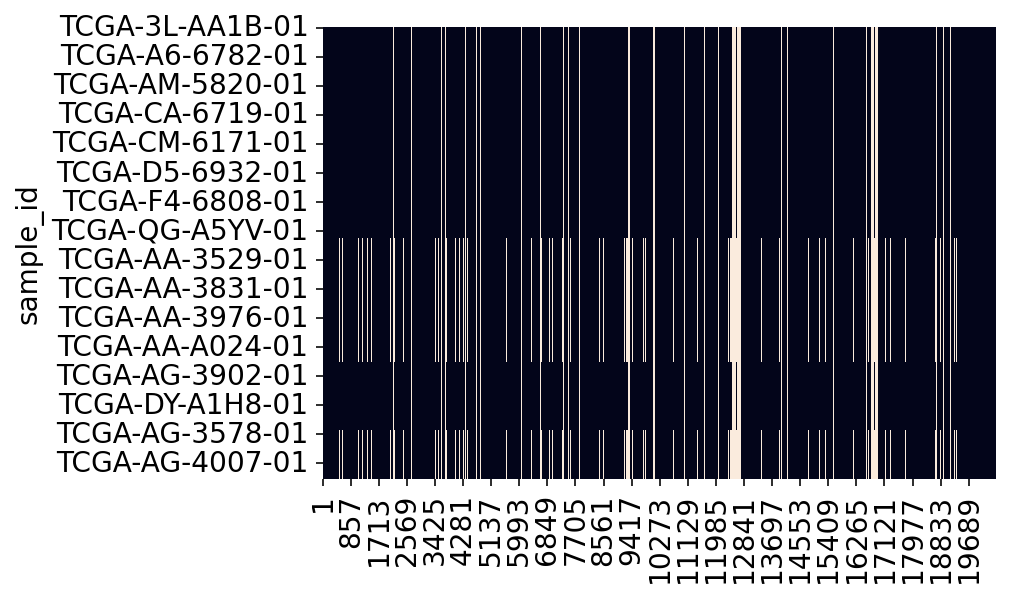

In [ ]:
raw_gene = raw_data.iloc[0:,2:].transpose()
raw_gene.rename(columns={0:'sample_id'}, inplace=True)
raw_gene.set_index('sample_id', inplace=True)
sns.heatmap(raw_gene.isnull(), cbar=False)

In [ ]:
raw_gene.shape

(592, 20531)

In [ ]:
gene_id = raw_data.iloc[1:,1]
gene_id.loc[[1, 875, 1713, 2569, 3425, 4281, 5137, 5993, 6849, 7705, 8561, 9417, 10273, 11129, 11985, 12841, 13697, 14553, 15409, 16265, 17121, 17977, 18833, 19689], ]

1        100130426
875         139322
1713        282966
2569        643155
3425          8317
4281          1417
5137         57572
5993         55719
6849          8811
7705         51564
8561         84223
9417         23395
10273         7804
11129       116534
11985        79707
12841       283208
13697         5368
14553         9366
15409       154661
16265         6518
17121       389517
17977         7059
18833        23617
19689         7516
Name: 1, dtype: object

In [ ]:
# Gene expression quality control
# Filtering out genes without any values
raw_data.dropna(axis=0, how='any', thresh=355, inplace=True) # keep rows with at least 60% non-NaN values

In [ ]:
raw_data.shape

(19211, 594)

In [ ]:
# Create "observations" subset
# Check unique values of each feature
observations = raw_data.iloc[:1, 2:].transpose()
observations.rename(columns={0:'sample_id'}, inplace=True)
observations['patient_id'] = observations['sample_id'].str[:12]
observations['source_site'] = observations['sample_id'].str[:7].astype('category')
observations.set_index('sample_id', inplace=True)

observations.head()

,patient_id,source_site
sample_id,,
TCGA-3L-AA1B-01,TCGA-3L-AA1B,TCGA-3L
TCGA-4N-A93T-01,TCGA-4N-A93T,TCGA-4N
TCGA-4T-AA8H-01,TCGA-4T-AA8H,TCGA-4T
TCGA-5M-AAT4-01,TCGA-5M-AAT4,TCGA-5M
TCGA-5M-AAT5-01,TCGA-5M-AAT5,TCGA-5M


In [ ]:
observations.shape

(592, 2)

In [ ]:
observations['patient_id'].nunique()

592

In [ ]:
observations['source_site'].nunique()

37

In [ ]:
# Create "variables" subset 
variables = raw_data.iloc[1:, 0:2]
variables.rename(columns = {0:'Hugo_Symbol', 1:'Entrez_Gene_Id'}, inplace=True)
variables['index'] = variables.index
variables['index'] = variables['index'].astype('str')
variables.set_index('index', inplace=True)
variables.head(10)

,Hugo_Symbol,Entrez_Gene_Id
index,,
1,NaN,100130426
2,NaN,100133144
3,UBE2Q2P2,100134869
4,HMGB1P1,10357
5,NaN,10431
7,NaN,155060
8,RNU12-2P,26823
11,EZHIP,340602
12,EFCAB8,388795


In [ ]:
variables['Entrez_Gene_Id'].nunique()
#Entrez_Gene_Id is not unique

19189

In [ ]:
# Create "data_matrix" subset
data_matrix = raw_data.iloc[:,2:].transpose()  
data_matrix.rename(columns={0: 'sample_id'}, inplace=True)
data_matrix.set_index('sample_id', inplace=True)
data_matrix.columns = data_matrix.columns.astype('str')

In [ ]:
# data_matrix summary
data_matrix.head().append(data_matrix.tail())

,1,2,3,4,5,7,8,11,12,13,...,20522,20523,20524,20525,20526,20527,20528,20529,20530,20531
sample_id,,,,,,,,,,,,,,,,,,,,,
TCGA-3L-AA1B-01,0.7981,1.6905,1.9068,0.7458,0.3572,4.9963,2.5034,-0.5022,1.5585,-1.1044,...,1.2458,0.1254,1.5265,1.9041,2.1862,0.5758,-1.7449,1.2799,-2.3005,2.1609
TCGA-4N-A93T-01,-5.5534,-0.2648,-0.4676,0.7168,2.4251,5.4312,-0.6054,-2.4195,1.5595,-1.1035,...,-1.4338,-0.727,-0.6711,0.7206,2.4134,-1.1532,-3.9237,0.6431,-2.5295,-2.0323
TCGA-4T-AA8H-01,-5.5534,0.8189,1.2713,0.7258,1.0227,3.8785,3.8294,-2.4195,1.9697,-0.6859,...,2.1326,1.3208,-1.5396,0.4724,2.0699,-1.7828,-1.013,0.5523,-0.6071,0.1905
TCGA-5M-AAT4-01,-5.5534,0.5066,2.2447,0.7753,2.801,4.5983,2.8292,-2.4195,1.3171,-2.3649,...,1.7637,2.4208,0.5327,2.7372,3.4521,-1.2117,-2.437,0.418,-2.7636,0.5772
TCGA-5M-AAT5-01,-5.5534,1.1235,2.4542,2.1804,2.8737,3.7993,0.7311,-2.4195,4.7231,-0.7863,...,2.9761,0.818,-1.8164,1.5215,2.8586,0.6037,-1.6973,0.2519,-2.9194,-1.0094
TCGA-AG-A026-01,NaN,1.596,2.5816,2.4178,1.3337,3.9956,NaN,NaN,-1.6824,0.1717,...,1.6869,0.4431,0.7431,1.891,2.589,-1.5797,-0.781,0.2106,-2.6383,0.2219
TCGA-AG-A02G-01,NaN,1.4207,2.3138,2.9951,0.7512,4.9852,NaN,NaN,-2.0975,-3.7002,...,1.1293,0.0005,2.2577,4.0414,2.5358,-1.7828,-2.6587,0.0494,-1.7385,-1.9103
TCGA-AG-A02N-01,NaN,1.8004,-1.1337,2.7559,1.0474,1.9729,NaN,NaN,-0.2407,1.2311,...,3.1372,1.393,1.4417,3.7918,3.7183,-1.4066,0.0767,-0.4717,-2.6534,3.227
TCGA-AG-A02X-01,NaN,0.9528,-0.0085,3.0254,-0.2685,2.5133,NaN,NaN,1.687,-0.9648,...,2.8248,1.1816,1.5568,2.1909,3.676,-1.7828,-1.7383,0.7981,-1.6732,1.7661


In [ ]:
data_matrix.shape

(592, 19210)

In [ ]:
data_matrix.columns

Index(['1', '2', '3', '4', '5', '7', '8', '11', '12', '13',
       ...
       '20522', '20523', '20524', '20525', '20526', '20527', '20528', '20529',
       '20530', '20531'],
      dtype='object', length=19210)

In [ ]:
# Re-check unique percentage of missing data in columns
ptg_missing_col = data_matrix.isna().mean().round(4)
unique_ptg = set(ptg_missing_col)
print(unique_ptg)

{0.3834, 0.0}


In [ ]:
# Replace missing data with 0.0
data_matrix.fillna(0.0, inplace=True)

In [ ]:
path3 = '/content/drive/My Drive/MSK/gene_modified.csv'
with open(path3, 'w', encoding = 'utf-8-sig') as f:
  data_matrix.to_csv(f)

In [ ]:
data_matrix.columns.equals(variables.index)

True

In [ ]:
adata = sc.AnnData(X=data_matrix, obs=observations, var=variables)
print(adata.var)

      Hugo_Symbol Entrez_Gene_Id
index                           
1             NaN      100130426
2             NaN      100133144
3        UBE2Q2P2      100134869
4         HMGB1P1          10357
5             NaN          10431
...           ...            ...
20527      ZYG11A         440590
20528      ZYG11B          79699
20529         ZYX           7791
20530       ZZEF1          23140
20531        ZZZ3          26009

[19210 rows x 2 columns]


/usr/local/lib/python3.8/dist-packages/anndata/utils.py:143: UserWarning: X converted to numpy array with dtype object
  warnings.warn(f"{name} converted to numpy array with dtype {arr.dtype}")
<ipython-input-24-1ef389af08a2>:1: FutureWarning: X.dtype being converted to np.float32 from object. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(X=data_matrix, obs=observations, var=variables)


In [ ]:
adata.obs

,patient_id,source_site
sample_id,,
TCGA-3L-AA1B-01,TCGA-3L-AA1B,TCGA-3L
TCGA-4N-A93T-01,TCGA-4N-A93T,TCGA-4N
TCGA-4T-AA8H-01,TCGA-4T-AA8H,TCGA-4T
TCGA-5M-AAT4-01,TCGA-5M-AAT4,TCGA-5M
TCGA-5M-AAT5-01,TCGA-5M-AAT5,TCGA-5M
...,...,...
TCGA-AG-A026-01,TCGA-AG-A026,TCGA-AG
TCGA-AG-A02G-01,TCGA-AG-A02G,TCGA-AG
TCGA-AG-A02N-01,TCGA-AG-A02N,TCGA-AG


In [ ]:
# Gene expression quality control
# Mitochondrial genes
adata.var['mt'] = adata.var['Hugo_Symbol'].str.startswith('MT-')
# Ribosomal genes
adata.var['ribo'] = adata.var['Hugo_Symbol'].str.startswith(("RPS","RPL"))
# Hemoglobin genes
adata.var['hb'] = adata.var['Hugo_Symbol'].str.contains(("^HB[^(P)]"))

adata.var.fillna({'mt': False, 'ribo': False, 'hb': False}, inplace=True)
adata.var

,Hugo_Symbol,Entrez_Gene_Id,mt,ribo,hb
index,,,,,
1,NaN,100130426,False,False,False
2,NaN,100133144,False,False,False
3,UBE2Q2P2,100134869,False,False,False
4,HMGB1P1,10357,False,False,False
5,NaN,10431,False,False,False
...,...,...,...,...,...
20527,ZYG11A,440590,False,False,False
20528,ZYG11B,79699,False,False,False
20529,ZYX,7791,False,False,False


In [ ]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt','ribo','hb'], percent_top=None, log1p=False, inplace=True)

In [ ]:
adata.obs

,patient_id,source_site,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,total_counts_hb,pct_counts_hb
sample_id,,,,,,,,,,
TCGA-3L-AA1B-01,TCGA-3L-AA1B,TCGA-3L,19210,-7123.037109,0.0,-0.0,80.927322,-1.136135,-26.153801,0.367172
TCGA-4N-A93T-01,TCGA-4N-A93T,TCGA-4N,19210,-22956.919922,0.0,-0.0,36.806400,-0.160328,-29.920898,0.130335
TCGA-4T-AA8H-01,TCGA-4T-AA8H,TCGA-4T,19209,-24643.072266,0.0,-0.0,20.799793,-0.084404,-14.045599,0.056996
TCGA-5M-AAT4-01,TCGA-5M-AAT4,TCGA-5M,19210,-12989.598633,0.0,-0.0,153.753860,-1.183669,-19.351700,0.148978
TCGA-5M-AAT5-01,TCGA-5M-AAT5,TCGA-5M,19210,-21050.933594,0.0,-0.0,99.814674,-0.474158,-11.555200,0.054892
...,...,...,...,...,...,...,...,...,...,...
TCGA-AG-A026-01,TCGA-AG-A026,TCGA-AG,17494,-437.010864,0.0,-0.0,5.994001,-1.371591,-15.159101,3.468816
TCGA-AG-A02G-01,TCGA-AG-A02G,TCGA-AG,17495,-3872.196777,0.0,-0.0,146.025284,-3.771122,-8.556499,0.220973
TCGA-AG-A02N-01,TCGA-AG-A02N,TCGA-AG,17495,-2660.751221,0.0,-0.0,40.337418,-1.516016,-0.842699,0.031671


In [ ]:
# n_genes_by_counts: number of genes with expressions
# total_counts: sum of gene expressions of each observation
# pct_counts_mt: the percentage of Mitochondrial genes expression over the sum expression of each observation
# pct_counts_hb: the percentage of Hemoglobin genes expression over the sum expression of each observation
# pct_counts_ribo: the percentage of Ribosomal genes expression over the sum expression of each observation

In [ ]:
adata.obs['total_counts']

sample_id
TCGA-3L-AA1B-01    -7123.037109
TCGA-4N-A93T-01   -22956.919922
TCGA-4T-AA8H-01   -24643.072266
TCGA-5M-AAT4-01   -12989.598633
TCGA-5M-AAT5-01   -21050.933594
                       ...     
TCGA-AG-A026-01     -437.010864
TCGA-AG-A02G-01    -3872.196777
TCGA-AG-A02N-01    -2660.751221
TCGA-AG-A02X-01   -13174.115234
TCGA-AG-A032-01     1628.457764
Name: total_counts, Length: 592, dtype: float32

normalizing counts per cell
    finished (0:00:00)


/usr/local/lib/python3.8/dist-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


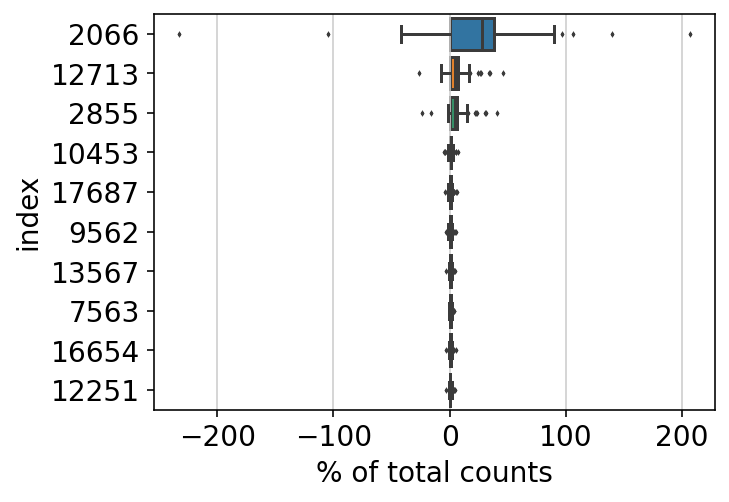

In [ ]:
# Output top 10 genes with the high expression levels
sc.pl.highest_expr_genes(adata, n_top=10)

In [ ]:
adata.var.loc[['2066','12713','2855','10453','17687','9562','13567','7563','16654','12251']]

,Hugo_Symbol,Entrez_Gene_Id,mt,ribo,hb,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
index,,,,,,,,,
2066,C18orf20,221241,False,False,False,365,-3934.880127,38.344595,-2.329449e+06
12713,OR8D2,283160,False,False,False,365,-706.248230,38.344595,-4.180989e+05
2855,CABP5,56344,False,False,False,365,-611.762817,38.344595,-3.621636e+05
10453,LYZL6,57151,False,False,False,365,-98.493233,38.344595,-5.830799e+04
17687,TAS2R40,259286,False,False,False,365,-92.147217,38.344595,-5.455115e+04
9562,LHX8,431707,False,False,False,365,-80.832809,38.344595,-4.785302e+04
13567,PLCZ1,89869,False,False,False,365,-76.894096,38.344595,-4.552130e+04
7563,GUCY2E,390226,False,False,False,365,-75.279984,38.344595,-4.456575e+04
16654,SNORA49,677829,False,False,False,365,-75.963013,38.344595,-4.497010e+04


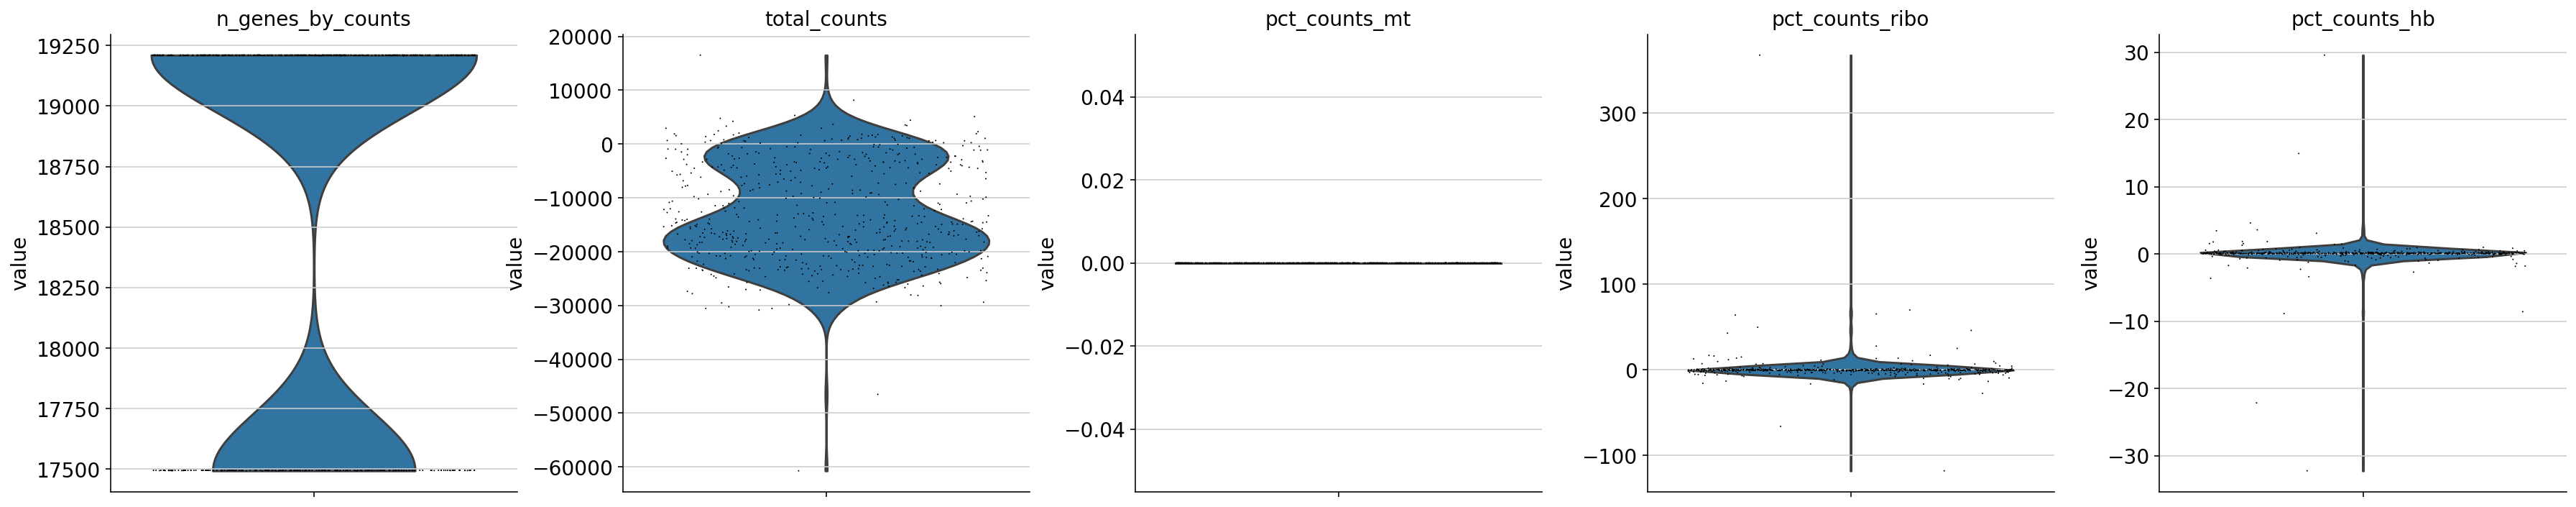

In [ ]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb'], 
             jitter=0.4, rotation = 45, multi_panel=True)

computing PCA
    with n_comps=50
    finished (0:00:01)


/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


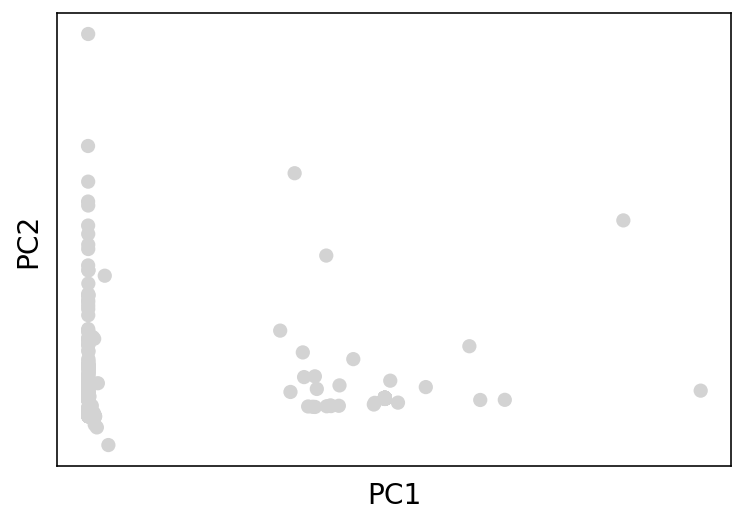

In [ ]:
# Principle component analysis (global structure)
# linear dimensionality reduction using singular value decomposition
sc.tl.pca(adata, svd_solver='arpack') 
sc.pl.pca(adata)

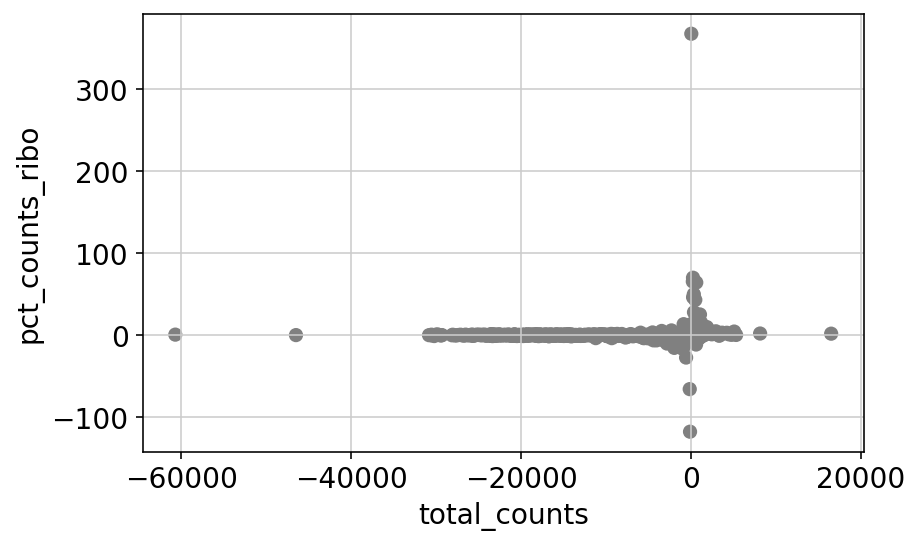

In [ ]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_ribo') 

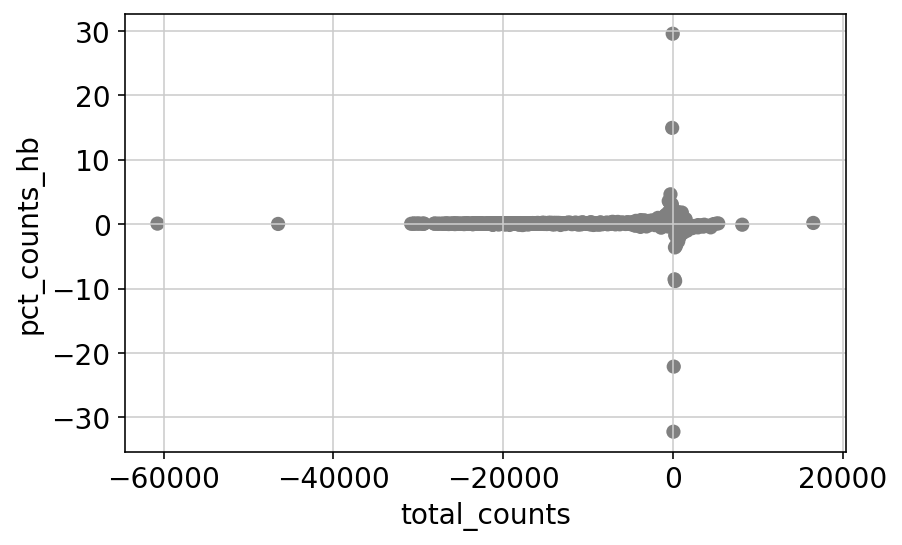

In [ ]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_hb')

In [ ]:
# Create dimensionality-reducted neighborhood graph using UMAP (local structure)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=20) # n_neighbors is set as default value
sc.tl.umap(adata)

computing PCA
    with n_comps=50
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


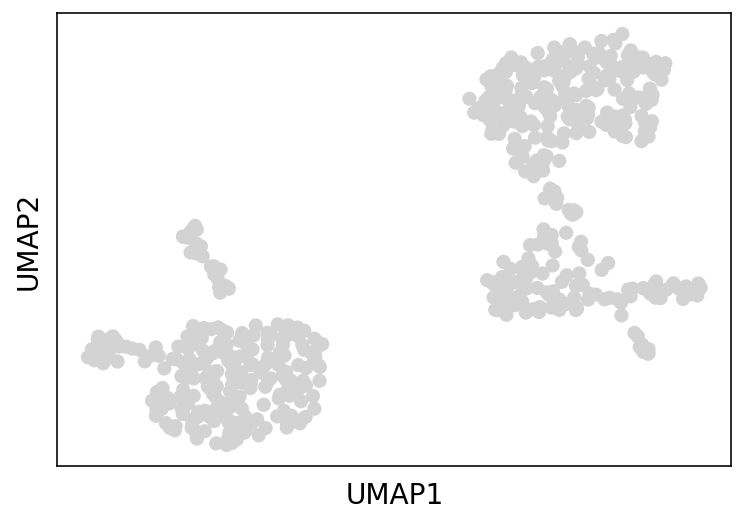

In [ ]:
sc.pl.umap(adata)

In [ ]:
# Dimensionality reduction using t-SNE
sc.tl.tsne(adata, n_pcs=20)

computing tSNE
    using 'X_pca' with n_pcs = 20
    using sklearn.manifold.TSNE


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:02)


/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


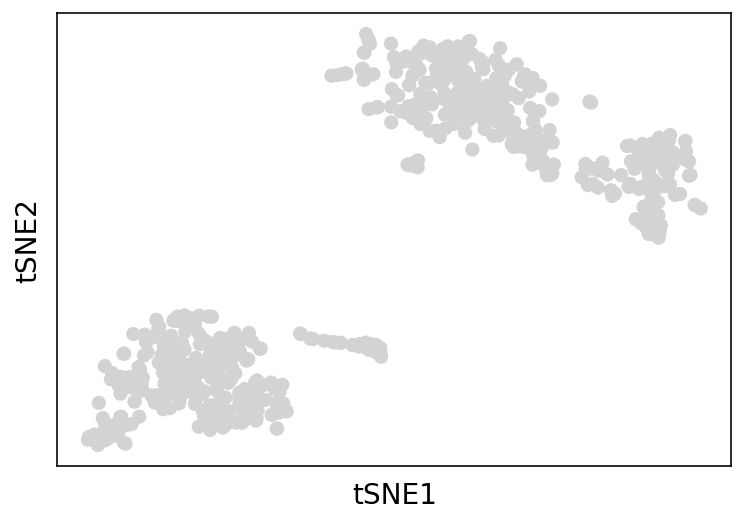

In [ ]:
sc.pl.tsne(adata)

##Leiden

In [ ]:
!pip install leidenalg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 33.9 MB/s 
     |████████████████████████████████| 3.3 MB 53.0 MB/s 


In [ ]:
sc.tl.leiden(adata, resolution=0.3, key_added="leiden_0.3")
sc.tl.leiden(adata, resolution=0.5, key_added="leiden_0.5")
sc.tl.leiden(adata, resolution=0.7, key_added="leiden_0.7")

running Leiden clustering
    finished: found 5 clusters and added
    'leiden_0.3', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 6 clusters and added
    'leiden_0.5', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 9 clusters and added
    'leiden_0.7', the cluster labels (adata.obs, categorical) (0:00:00)


/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


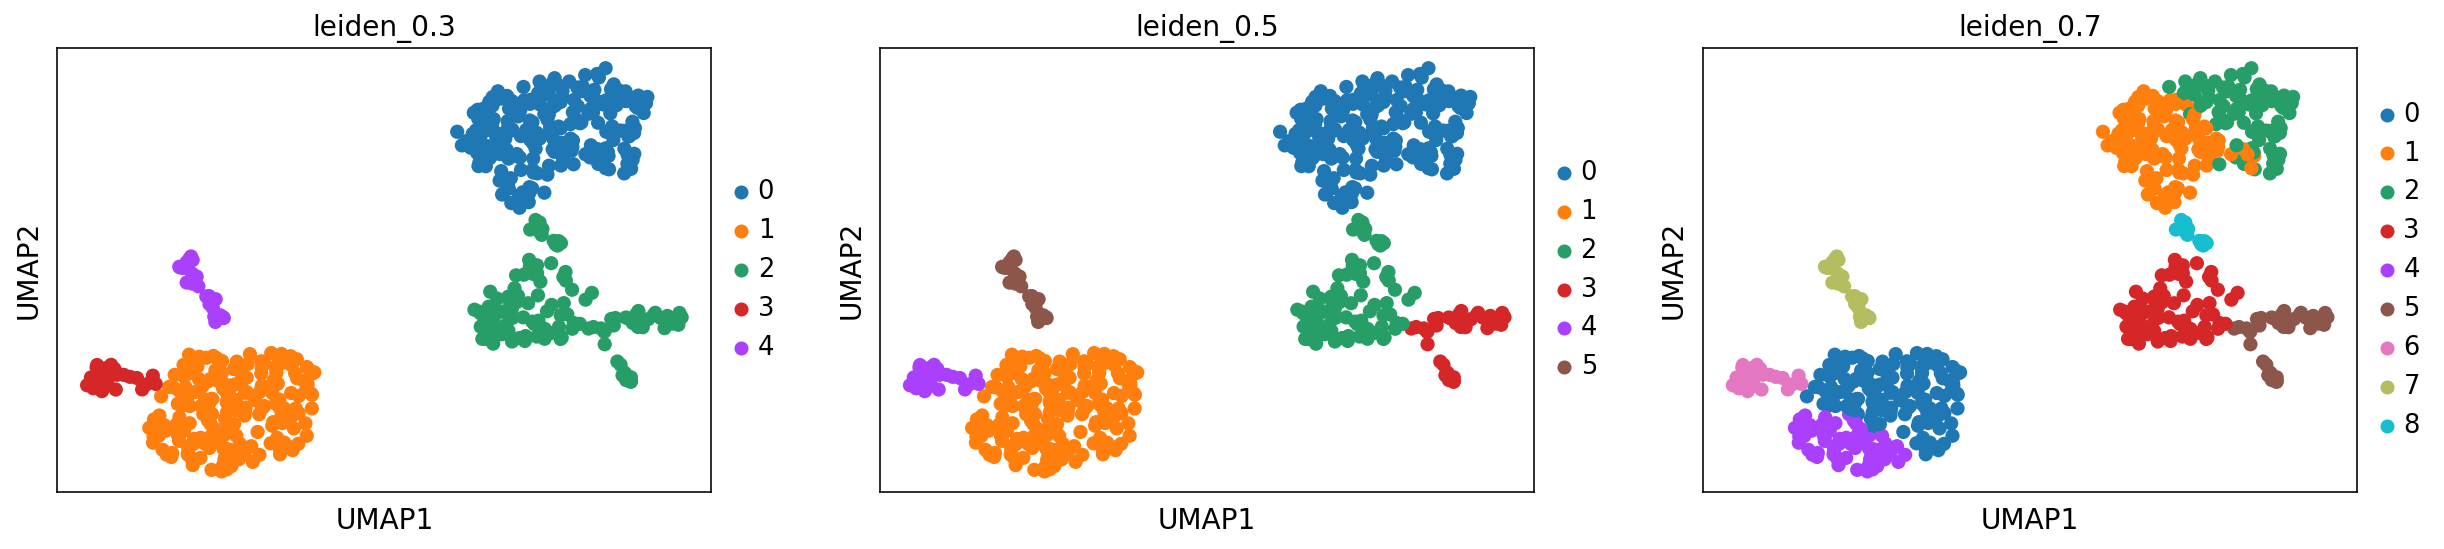

In [ ]:
sc.pl.umap(adata, color=['leiden_0.3', 'leiden_0.5', 'leiden_0.7'])

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden_0.5']`


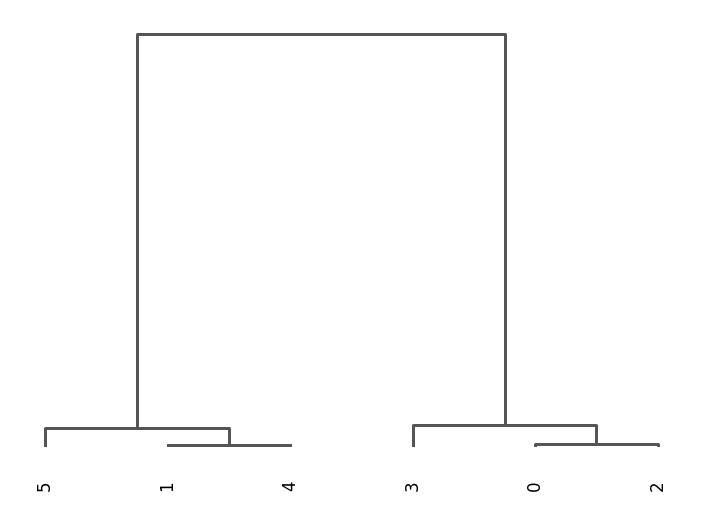

<AxesSubplot: >

In [ ]:
sc.tl.dendrogram(adata, groupby="leiden_0.5")
sc.pl.dendrogram(adata, groupby="leiden_0.5")

In [ ]:
adata

AnnData object with n_obs × n_vars = 592 × 19210
    obs: 'patient_id', 'source_site', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'leiden_0.3', 'leiden_0.5', 'leiden_0.7'
    var: 'Hugo_Symbol', 'Entrez_Gene_Id', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'pca', 'neighbors', 'umap', 'tsne', 'leiden', 'leiden_0.3_colors', 'leiden_0.5_colors', 'leiden_0.7_colors', 'dendrogram_leiden_0.5'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [ ]:
adata.obs['leiden_0.5']

sample_id
TCGA-3L-AA1B-01    3
TCGA-4N-A93T-01    0
TCGA-4T-AA8H-01    0
TCGA-5M-AAT4-01    5
TCGA-5M-AAT5-01    0
                  ..
TCGA-AG-A026-01    1
TCGA-AG-A02G-01    1
TCGA-AG-A02N-01    1
TCGA-AG-A02X-01    1
TCGA-AG-A032-01    1
Name: leiden_0.5, Length: 592, dtype: category
Categories (6, object): ['0', '1', '2', '3', '4', '5']

In [ ]:
group_5 = adata[adata.obs['leiden_0.5'].isin(['5'])]
group_5.obs['patient_id']

sample_id
TCGA-5M-AAT4-01    TCGA-5M-AAT4
TCGA-5M-AAT6-01    TCGA-5M-AAT6
TCGA-A6-2682-01    TCGA-A6-2682
TCGA-A6-6138-01    TCGA-A6-6138
TCGA-A6-A566-01    TCGA-A6-A566
TCGA-AA-3495-01    TCGA-AA-3495
TCGA-AA-3675-01    TCGA-AA-3675
TCGA-AD-6548-01    TCGA-AD-6548
TCGA-AD-6963-01    TCGA-AD-6963
TCGA-AZ-5403-01    TCGA-AZ-5403
TCGA-CM-6674-01    TCGA-CM-6674
TCGA-D5-6534-01    TCGA-D5-6534
TCGA-D5-6926-01    TCGA-D5-6926
TCGA-D5-6932-01    TCGA-D5-6932
TCGA-F4-6569-01    TCGA-F4-6569
TCGA-F4-6809-01    TCGA-F4-6809
TCGA-G4-6320-01    TCGA-G4-6320
TCGA-QG-A5YW-01    TCGA-QG-A5YW
TCGA-WS-AB45-01    TCGA-WS-AB45
TCGA-AF-6655-01    TCGA-AF-6655
TCGA-AG-3731-01    TCGA-AG-3731
TCGA-CI-6624-01    TCGA-CI-6624
TCGA-DC-5869-01    TCGA-DC-5869
TCGA-EI-6510-01    TCGA-EI-6510
TCGA-EI-6511-01    TCGA-EI-6511
TCGA-F5-6465-01    TCGA-F5-6465
Name: patient_id, dtype: object

In [ ]:
input_file = '/content/drive/MyDrive/MSK/patient-clinic-modified.csv'
patient_modified = pd.read_table(input_file, sep=',')
patient_modified

,PATIENT_ID,CANCER_TYPE_ACRONYM,AGE,SEX,AJCC_PATHOLOGIC_TUMOR_STAGE,HISTORY_NEOADJUVANT_TRTYN,ICD_10,PATH_M_STAGE,PATH_N_STAGE,PATH_T_STAGE,PERSON_NEOPLASM_CANCER_STATUS,PRIMARY_LYMPH_NODE_PRESENTATION_ASSESSMENT,PRIOR_DX,RADIATION_THERAPY,IN_PANCANPATHWAYS_FREEZE,OS_STATUS,OS_MONTHS,AGE_bin
0,TCGA-3L-AA1B,COAD,61.0,Female,STAGE I,No,C18.0,M0,N0,T2,Tumor Free,Yes,No,No,Yes,0,15.616267,0
1,TCGA-4N-A93T,COAD,67.0,Male,STAGE IIIB,No,C18.2,M0,N1B,T4A,With Tumor,Yes,No,No,Yes,0,4.799947,0
2,TCGA-4T-AA8H,COAD,42.0,Female,STAGE IIA,No,C18.6,MX,N0,T3,Tumor Free,Yes,No,No,Yes,0,12.657396,0
3,TCGA-5M-AAT4,COAD,74.0,Male,STAGE IV,No,C18.2,M1B,N0,T3,With Tumor,Yes,No,No,Yes,1,1.610941,1
4,TCGA-5M-AAT6,COAD,40.0,Female,STAGE IV,No,C18.2,M1A,N2B,T4A,With Tumor,Yes,No,No,Yes,1,9.534142,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,TCGA-F5-6814,READ,57.0,Male,STAGE IIA,No,C20,M0,N0,T3,Tumor Free,Yes,No,No,Yes,0,37.183154,0
579,TCGA-F5-6861,READ,60.0,Female,STAGE IIA,No,C20,M0,N0,T3,Tumor Free,Yes,No,No,Yes,0,38.136568,0
580,TCGA-F5-6863,READ,71.0,Female,STAGE IIIB,No,C20,M0,N1,T4A,NaN,Yes,No,No,Yes,1,11.868363,1
581,TCGA-F5-6864,READ,74.0,Female,STAGE IIIB,No,C20,M0,N2A,T3,Tumor Free,Yes,No,No,Yes,0,12.460137,1


<AxesSubplot: title={'center': 'Cancer Type (total population)'}, ylabel='CANCER_TYPE_ACRONYM'>

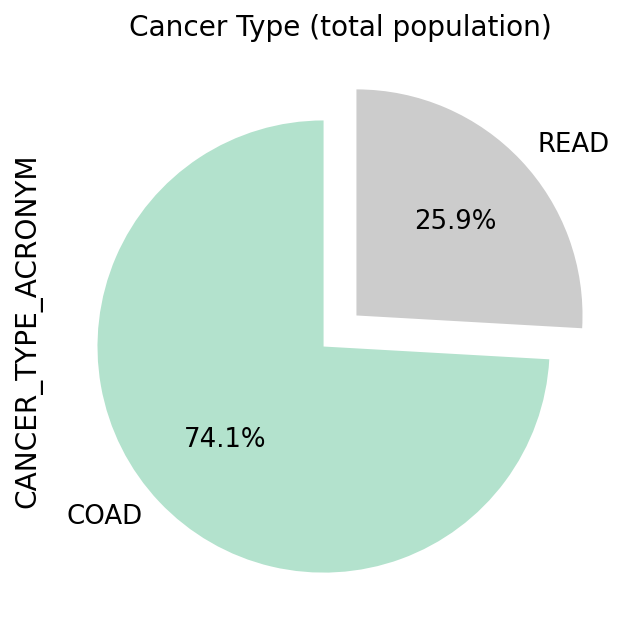

In [ ]:
kwargs = dict(
    startangle = 90,
    colormap   = 'Pastel2',
    fontsize   = 13,
    explode    = (0.1,0.1),
    figsize    = (60,5),
    autopct    = '%1.1f%%',
    title      = 'Cancer Type (total population)'
)

patient_modified['CANCER_TYPE_ACRONYM'].value_counts().plot.pie(**kwargs)

<AxesSubplot: title={'center': 'Sex (total population)'}, ylabel='SEX'>

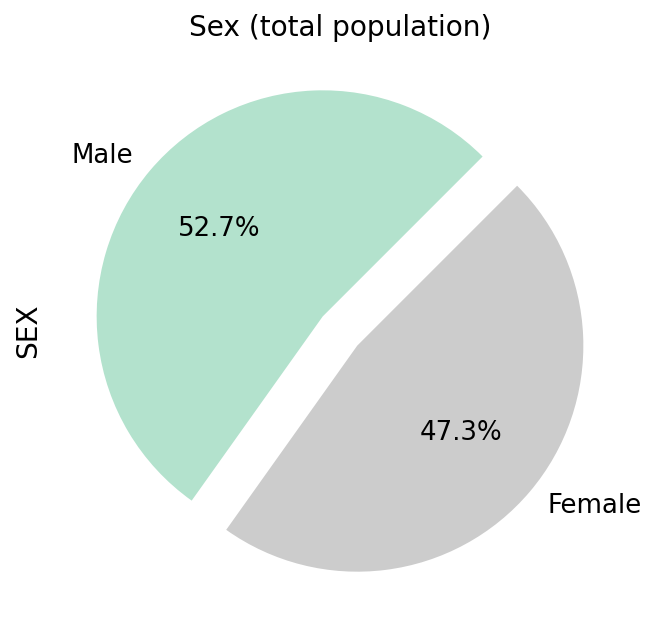

In [ ]:
kwargs = dict(
    startangle = 45,
    colormap   = 'Pastel2',
    fontsize   = 13,
    explode    = (0.1,0.1),
    figsize    = (60,5),
    autopct    = '%1.1f%%',
    title      = 'Sex (total population)'
)

patient_modified['SEX'].value_counts().plot.pie(**kwargs)

Text(0, 0.5, 'Age Distribution')

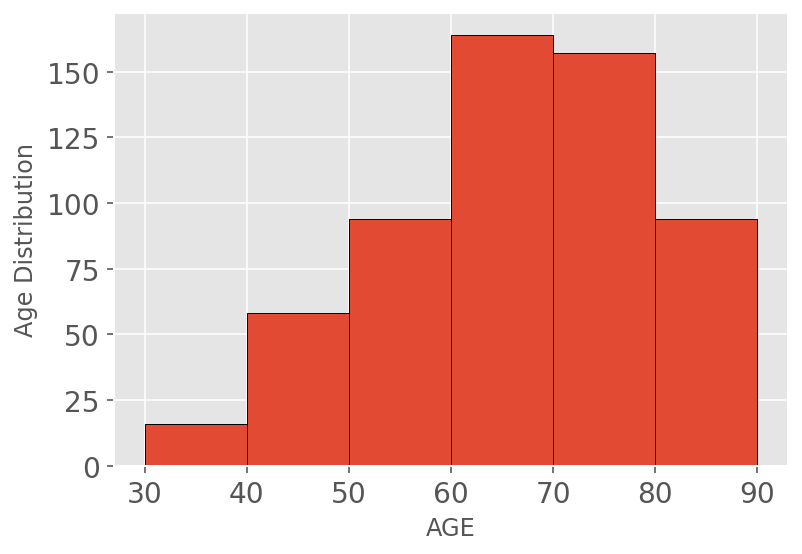

In [ ]:
bins = [30, 40, 50, 60, 70, 80, 90]
plt.hist(patient_modified["AGE"], bins = bins, edgecolor = "black")
plt.xlabel("AGE")
plt.ylabel("Age Distribution")

<AxesSubplot: >

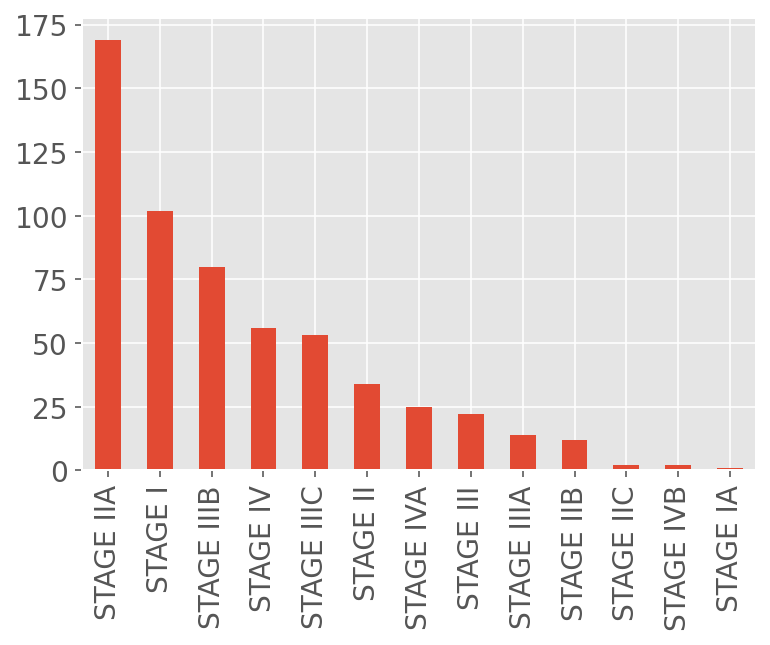

In [ ]:
patient_modified['AJCC_PATHOLOGIC_TUMOR_STAGE'].value_counts().plot(kind='bar')

<AxesSubplot: >

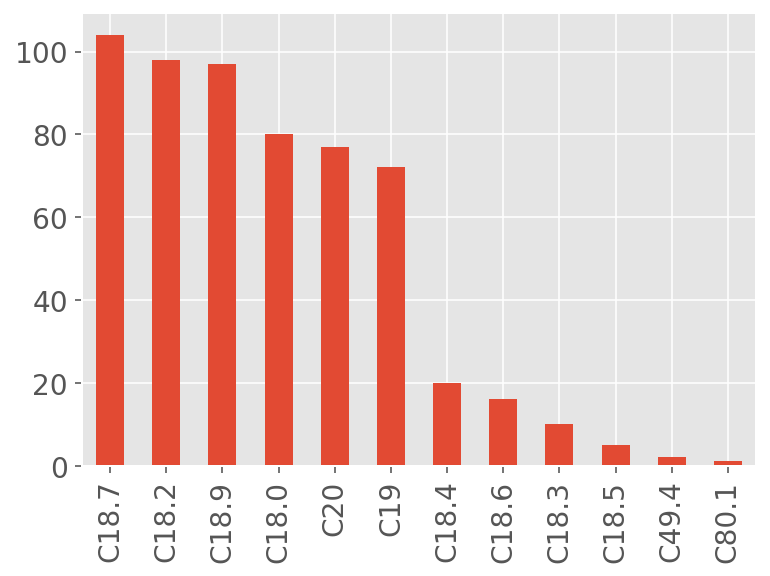

In [ ]:
 patient_modified['ICD_10'].value_counts().plot(kind='bar')

In [ ]:
# Subset clinic data of group 5 in Leiden_0.5
clinic_g5 = patient_modified[patient_modified.PATIENT_ID.isin(group_5.obs['patient_id'])]
clinic_g5.describe(include='all')

,PATIENT_ID,CANCER_TYPE_ACRONYM,AGE,SEX,AJCC_PATHOLOGIC_TUMOR_STAGE,HISTORY_NEOADJUVANT_TRTYN,ICD_10,PATH_M_STAGE,PATH_N_STAGE,PATH_T_STAGE,PERSON_NEOPLASM_CANCER_STATUS,PRIMARY_LYMPH_NODE_PRESENTATION_ASSESSMENT,PRIOR_DX,RADIATION_THERAPY,IN_PANCANPATHWAYS_FREEZE,OS_STATUS,OS_MONTHS,AGE_bin
count,25,25,25.000000,25,24,25,25,25,25,25,24,25,25,25,25,25.00000,25.000000,25.000000
unique,25,2,NaN,2,9,1,9,5,4,5,2,1,2,2,2,NaN,NaN,NaN
top,TCGA-5M-AAT4,COAD,NaN,Male,STAGE IIA,No,C18.2,M0,N0,T3,Tumor Free,Yes,No,No,Yes,NaN,NaN,NaN
freq,1,19,NaN,15,5,25,5,14,14,15,15,25,24,23,22,NaN,NaN,NaN
mean,NaN,NaN,62.320000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.24000,27.656902,0.320000
std,NaN,NaN,12.188519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.43589,17.046157,0.476095
min,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,1.610941,0.000000
25%,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,13.939573,0.000000
50%,NaN,NaN,62.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,24.920275,0.000000
75%,NaN,NaN,70.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,37.018772,1.000000


<AxesSubplot: title={'center': 'Cancer Type (group #5)'}, ylabel='CANCER_TYPE_ACRONYM'>

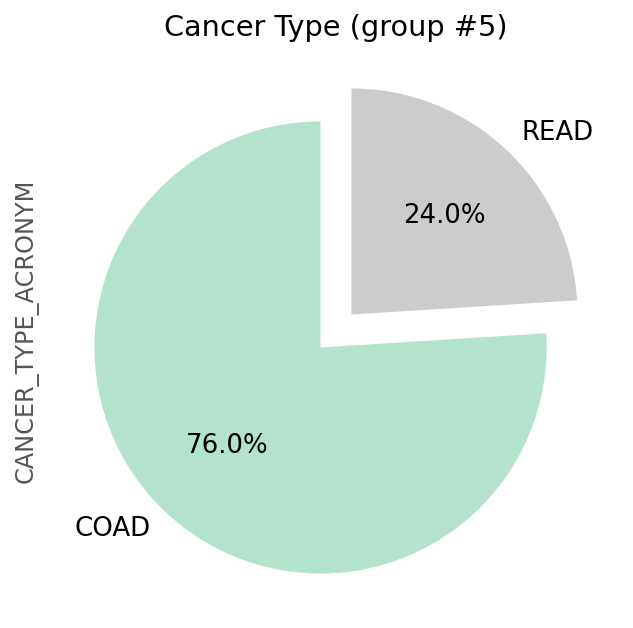

In [ ]:
kwargs = dict(
    startangle = 90,
    colormap   = 'Pastel2',
    fontsize   = 13,
    explode    = (0.1,0.1),
    figsize    = (60,5),
    autopct    = '%1.1f%%',
    title      = 'Cancer Type (group #5)'
)

clinic_g5['CANCER_TYPE_ACRONYM'].value_counts().plot.pie(**kwargs)

<AxesSubplot: title={'center': 'Sex (group #5)'}, ylabel='SEX'>

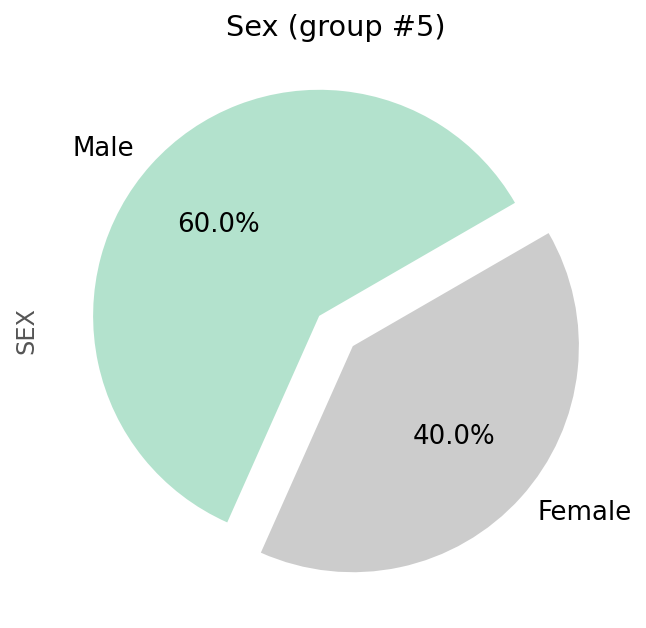

In [ ]:
kwargs = dict(
    startangle = 30,
    colormap   = 'Pastel2',
    fontsize   = 13,
    explode    = (0.1,0.1),
    figsize    = (60,5),
    autopct    = '%1.1f%%',
    title      = 'Sex (group #5)'
)

clinic_g5['SEX'].value_counts().plot.pie(**kwargs)

Text(0, 0.5, 'Age Distribution')

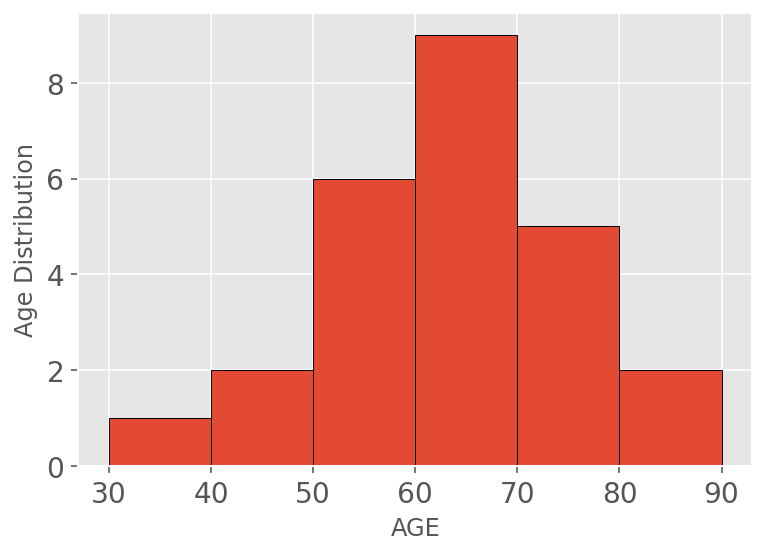

In [ ]:
bins = [30, 40, 50, 60, 70, 80, 90]
plt.hist(clinic_g5["AGE"], bins = bins, edgecolor = "black")
plt.xlabel("AGE")
plt.ylabel("Age Distribution")

<AxesSubplot: >

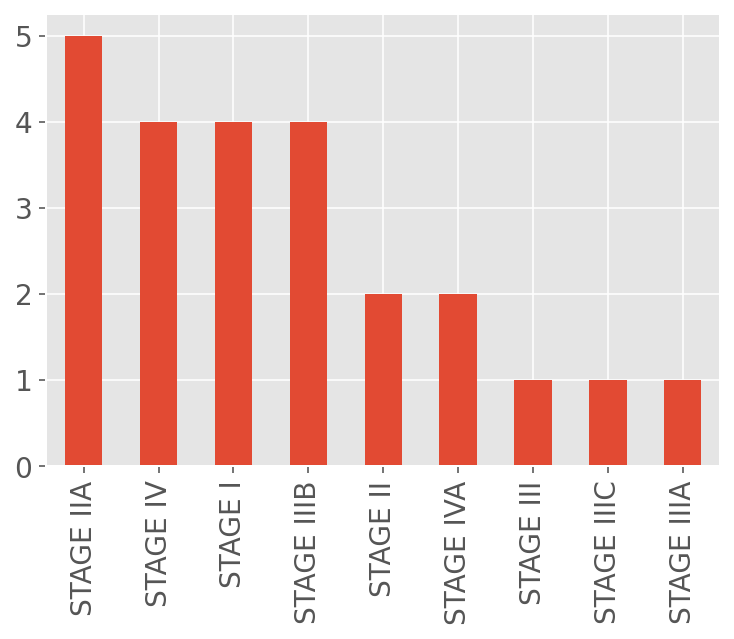

In [ ]:
clinic_g5['AJCC_PATHOLOGIC_TUMOR_STAGE'].value_counts().plot(kind='bar')

<AxesSubplot: >

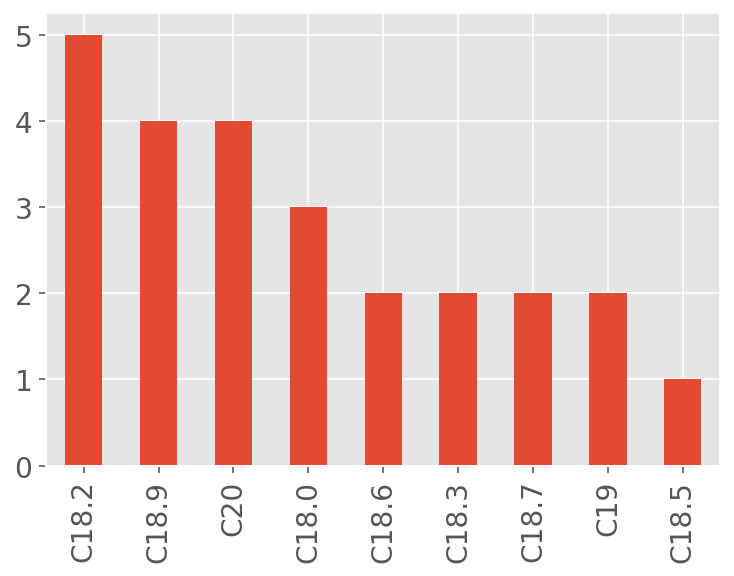

In [ ]:
clinic_g5['ICD_10'].value_counts().plot(kind='bar')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


/usr/local/lib/python3.8/dist-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/usr/local/lib/python3.8/dist-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


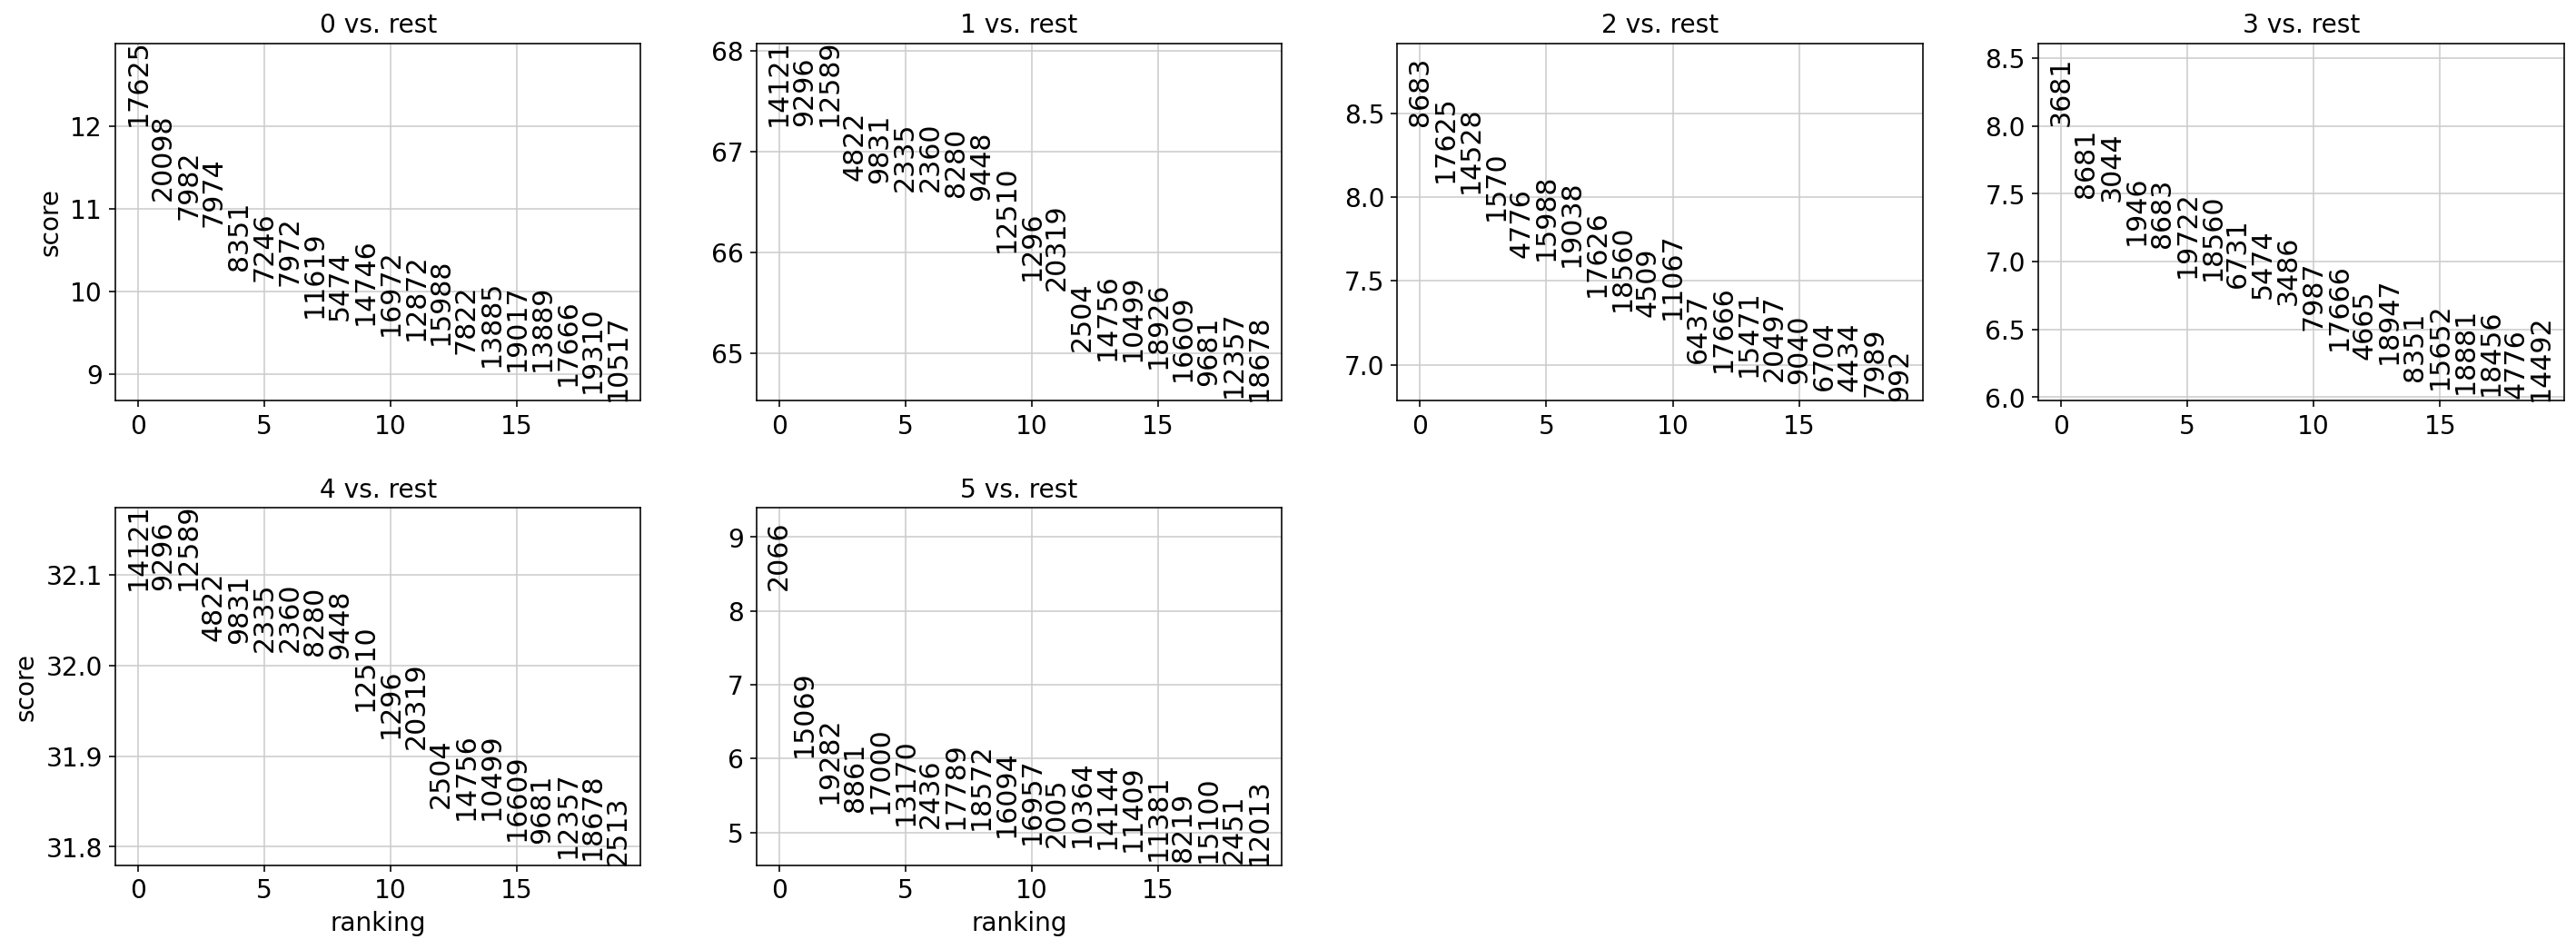

In [ ]:
# Find marker genes using t-test, wilcoxon, and logreg
sc.tl.rank_genes_groups(adata, 'leiden_0.5', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False, fontsize=15)

In [ ]:
list1 = [2066, 15069, 19282, 8861, 17000, 13170, 2436, 17789, 18572, 16094, 16957, 2005, 10364, 14144, 11409, 11381, 8219, 15100, 2451, 12013]

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


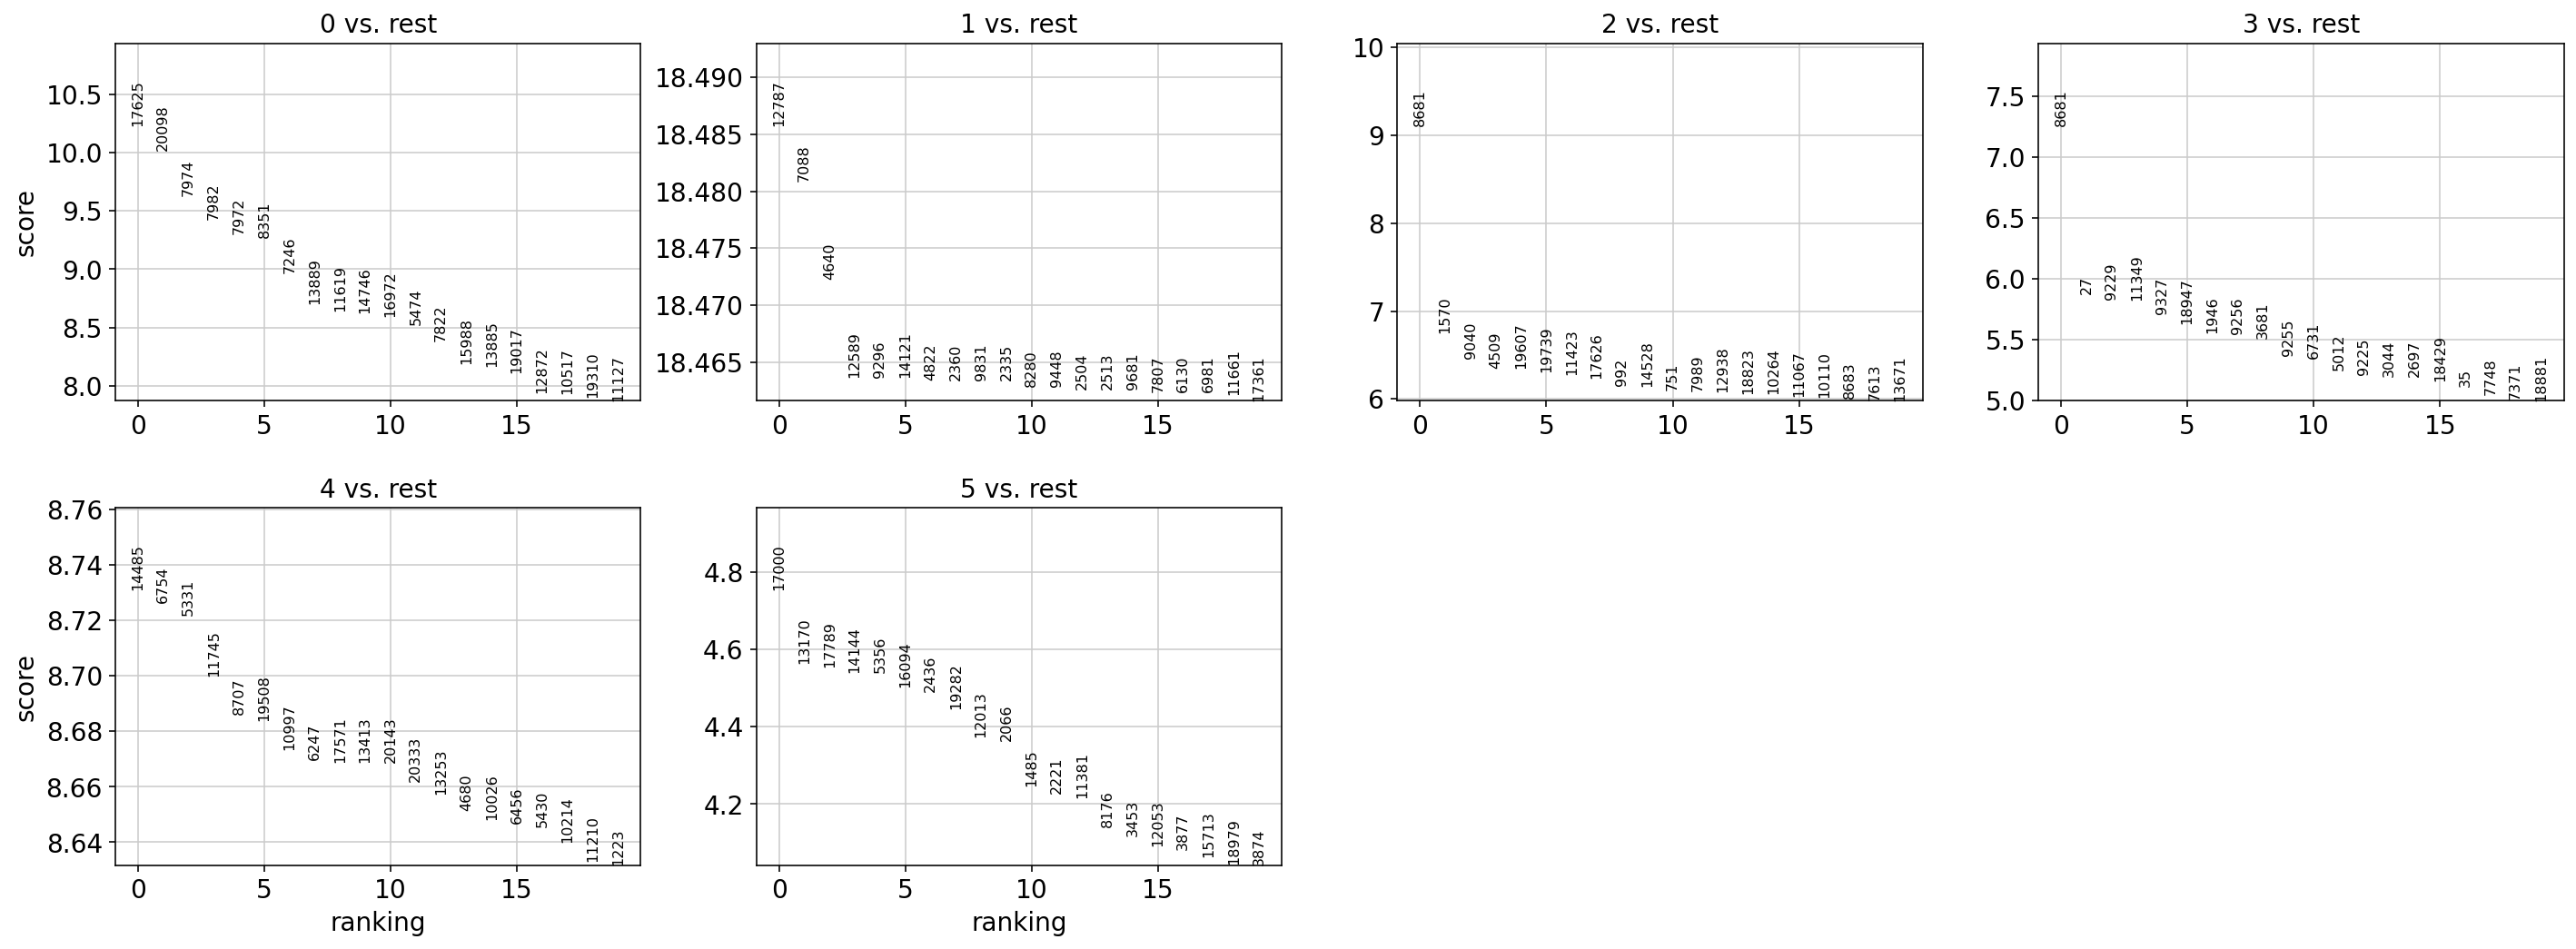

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden_0.5', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_gene=20, sharey=False)

In [ ]:
list2 = [17000, 13170, 17789, 14144, 5356, 16094, 2436, 19282, 12013, 2066, 1485, 2221, 11381, 8176, 3453, 12053, 3877, 15713, 18979, 3874]

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
 (0:00:16)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


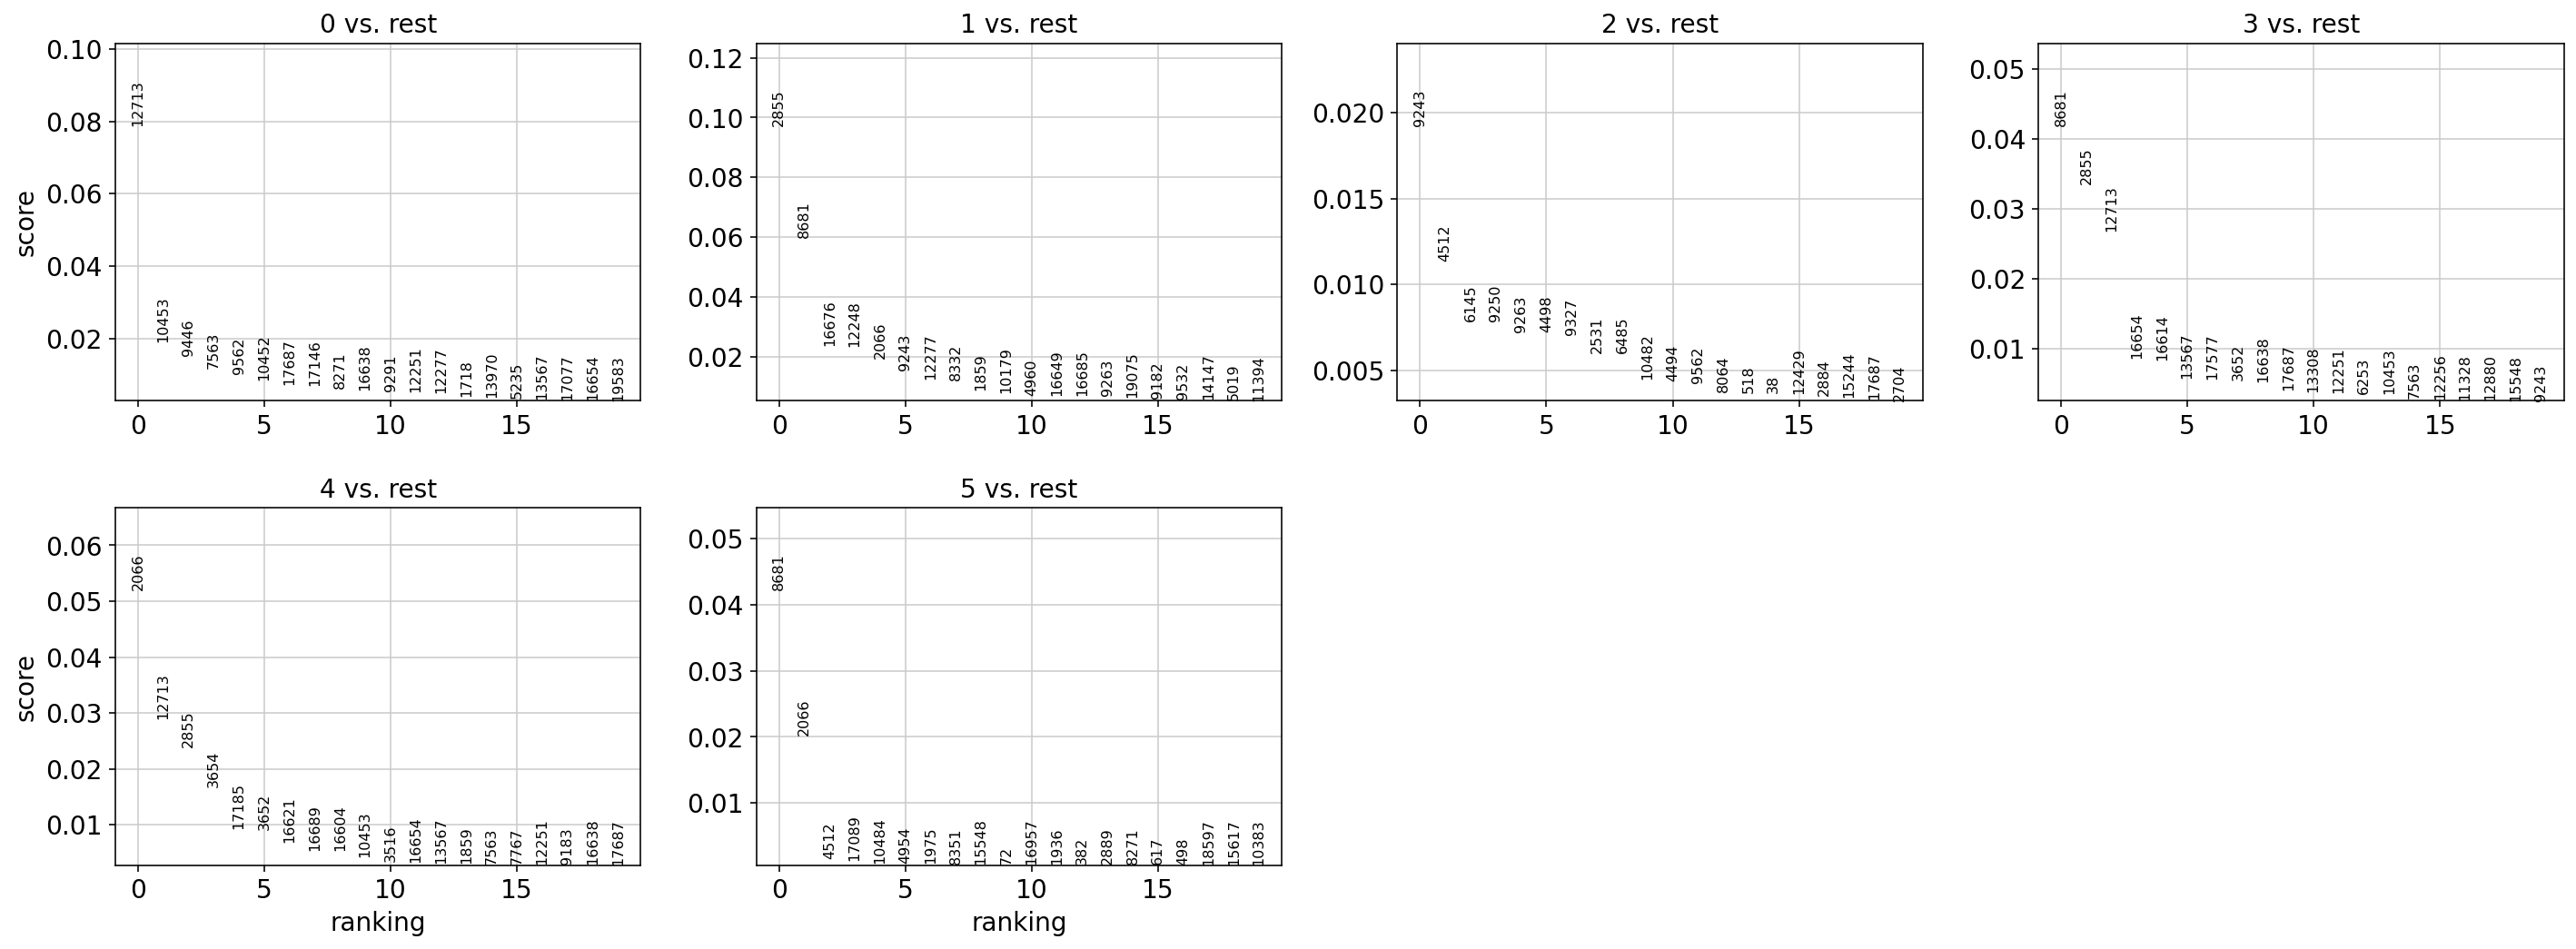

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden_0.5', method='logreg')
sc.pl.rank_genes_groups(adata, n_gene=20, sharey=False)

In [ ]:
list3 = [8681, 2066, 4512, 17089, 10484, 4954, 1975, 8351, 15548, 72, 16957, 1936, 382, 2889, 8271, 617, 498, 18597, 15617, 10383]

In [ ]:
list = list1 + list2 + list3

unilist = []
duplist = []
for i in list:
  if i not in unilist:
    unilist.append(i)
  else:
    duplist.append(i)
print("List of duplicates: ", duplist)
print("Number of components: ", len(duplist))

List of duplicates:  [17000, 13170, 17789, 14144, 16094, 2436, 19282, 12013, 2066, 11381, 2066, 16957]
Number of components:  12


In [ ]:
adata.var.loc[['17000', '13170', '17789', '14144', '16094', '2436', '19282', '12013', '2066', '11381', '16957']]

,Hugo_Symbol,Entrez_Gene_Id,mt,ribo,hb,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
index,,,,,,,,,
17000,SOD2,6648,False,False,False,592,0.077617,0.000000,4.594900e+01
13170,PDGFRL,5157,False,False,False,592,-1.152174,0.000000,-6.820872e+02
17789,TCEAL5,340543,False,False,False,592,-3.302906,0.000000,-1.955320e+03
14144,PRPH2,5961,False,False,False,592,-2.221564,0.000000,-1.315166e+03
16094,SLC10A6,345274,False,False,False,592,-0.487768,0.000000,-2.887589e+02
2436,C2orf74,339804,False,False,False,592,-2.209485,0.000000,-1.308015e+03
19282,USP44,84101,False,False,False,592,-1.614466,0.000000,-9.557642e+02
12013,NOVA2,4858,False,False,False,592,0.045616,0.000000,2.700490e+01
2066,C18orf20,221241,False,False,False,365,-3934.880127,38.344595,-2.329449e+06
